In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('DatScience_salary_data_cleaned.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Computer_Vision,R,Visualization,Tableau,Power BI,Machine_Learning,STATISTICS,Deep Learning,EXCEL,Deployment
0,Data Scientist 1,$57K-$94K (Glassdoor est.),"At NGL, we strive to make data-driven decision...",3.0,National Guardian Life Insurance Company\n3.0,"Madison, WI",-1,201 to 500 Employees,1909,Company - Private,...,0,1,1,1,0,1,0,0,1,0
1,Data Scientist,$57K-$94K (Glassdoor est.),About ClearCut Analytics\nClearCut was founded...,4.8,ClearCut Analytics\n4.8,"Chicago, IL",-1,1 to 50 Employees,2016,Company - Private,...,0,1,0,0,0,1,1,1,0,0
2,Data Scientist Virtual Hiring Event,$57K-$94K (Glassdoor est.),Oasis Systems Hiring Event!Event DetailsDate: ...,3.7,"Oasis Systems, LLC\n3.7","Washington, DC",-1,1001 to 5000 Employees,1997,Company - Private,...,1,1,1,0,0,0,0,0,0,0
3,Data Scientist Virtual Hiring Event,$57K-$94K (Glassdoor est.),"LMI Hiring Event!Event DetailsDate: Wednesday,...",4.2,LMI\n4.2,"McLean, VA",-1,1001 to 5000 Employees,1961,Nonprofit Organization,...,1,1,1,1,1,0,1,1,0,0
4,Certified Lab Scientist or Certified Lab Tech,$57K-$94K (Glassdoor est.),Prairie Ridge Health is looking for a team mem...,-1.0,Prairie Ridge Health,"Columbus, WI",-1,201 to 500 Employees,-1,Hospital,...,0,1,0,0,0,1,1,0,0,0


In [3]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Min_salary', 'Max_salary', 'Avg_salary',
       'Company_Name_Cleaned', 'Job_State_cleaned', 'Age', 'Python', 'SQL',
       'AWS', 'AZURE', 'BIG_DATA', 'Computer_Vision', 'R', 'Visualization',
       'Tableau', 'Power BI', 'Machine_Learning', 'STATISTICS',
       'Deep Learning', 'EXCEL', 'Deployment'],
      dtype='object')

In [4]:
df.rename(columns={'Job Title':'Job_Title'}, inplace=True)

In [5]:
df.Job_Title.value_counts()

Data Scientist                                     383
Data Engineer                                       69
Data Analyst                                        43
Machine Learning Engineer                           22
Senior Data Scientist                               17
                                                  ... 
Data Scientist (Decision Science Identity Team)      1
Sales Ops Data Analyst                               1
(Sr.) Data Scientist -                               1
Operations Analytics Manager                         1
Data Scientist, Growth Marketing                     1
Name: Job_Title, Length: 234, dtype: int64

In [6]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'data analyst' in title.lower():
        return 'data analyst'
    elif 'machine learning' in title.lower():
        return 'machine learning engineer'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    else:
        return 'na'
    
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
    

In [7]:
 df['Job_simplified']=df['Job_Title'].apply(title_simplifier)

In [8]:
df.Job_simplified.value_counts()

data scientist               548
data analyst                 132
na                           129
data engineer                123
machine learning engineer     54
manager                       10
director                       4
Name: Job_simplified, dtype: int64

In [9]:
 df['Seniority']=df['Job_Title'].apply(seniority)

In [10]:
df.Seniority.value_counts()

na        829
senior    171
Name: Seniority, dtype: int64

In [11]:
df.Job_State_cleaned.value_counts()

 CA              194
 VA              171
 NY               65
 MA               58
 MD               52
 IL               46
 DC               34
 WA               33
 TX               32
 FL               29
United States     24
Remote            24
 CO               22
 PA               20
 AL               18
 MO               16
 AZ               16
 TN               15
 OH               15
 NC               15
 GA               13
 MI               12
 UT               11
 NJ               10
 MN               10
 WI                9
 NE                7
 CT                7
 SC                4
 OR                3
 NM                3
 IA                2
 VI                2
 NH                2
 WY                2
 NV                1
 DE                1
 IN                1
 ID                1
Name: Job_State_cleaned, dtype: int64

In [12]:
df.Company_Name_Cleaned.value_counts()

MITRE\n                                    29
IntraEdge\n                                11
Novetta\n                                  10
Ibotta\n                                   10
2nd Watch, Inc.\n                           9
                                           ..
Cerner Corporation\n                        1
Reveal Global Consulting LLC                1
St. Jude Children's Research Hospital\n     1
realtor.com\n                               1
Time Solutions\n                            1
Name: Company_Name_Cleaned, Length: 537, dtype: int64

In [13]:
df['Company_Name_Cleaned']=df.Company_Name_Cleaned.apply(lambda x: x.replace('\n',''))

In [14]:
df.Company_Name_Cleaned.value_counts()

MITRE                            29
IntraEdge                        11
Ibotta                           10
Novetta                          10
2nd Watch, Inc.                   9
                                 ..
Redstone Federal Credit Union     1
Trovetechs Inc                    1
Edward Daniels Group              1
Evolvinc                          1
Time Solutions                    1
Name: Company_Name_Cleaned, Length: 537, dtype: int64

In [15]:
df.describe()

,Rating,Headquarters,Founded,Competitors,hourly,Min_salary,Max_salary,Avg_salary,Age,Python,...,Computer_Vision,R,Visualization,Tableau,Power BI,Machine_Learning,STATISTICS,Deep Learning,EXCEL,Deployment
count,1000.000000,1000.0,1000.000000,1000.0,1000.0,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.578300,-1.0,1694.160000,-1.0,0.0,85.330000,137.33000,111.330000,28.606000,0.700000,...,0.158000,1.0,0.524000,0.235000,0.033000,0.659000,0.549000,0.606000,0.485000,0.443000
std,1.170773,0.0,704.799362,0.0,0.0,28.067007,39.95359,33.587918,34.457337,0.458487,...,0.364924,0.0,0.499674,0.424211,0.178726,0.474283,0.497842,0.488879,0.500025,0.496989
min,-1.000000,-1.0,-1.000000,-1.0,0.0,27.000000,55.00000,41.000000,-1.000000,0.000000,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.300000,-1.0,1947.000000,-1.0,0.0,67.000000,111.00000,91.500000,7.000000,0.000000,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.800000,-1.0,1996.000000,-1.0,0.0,86.000000,144.00000,111.000000,17.000000,1.000000,...,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,4.200000,-1.0,2009.000000,-1.0,0.0,109.000000,162.00000,133.000000,39.000000,1.000000,...,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,5.000000,-1.0,2019.000000,-1.0,0.0,137.000000,212.00000,174.500000,239.000000,1.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
df.head()

,Job_Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Visualization,Tableau,Power BI,Machine_Learning,STATISTICS,Deep Learning,EXCEL,Deployment,Job_simplified,Seniority
0,Data Scientist 1,$57K-$94K (Glassdoor est.),"At NGL, we strive to make data-driven decision...",3.0,National Guardian Life Insurance Company\n3.0,"Madison, WI",-1,201 to 500 Employees,1909,Company - Private,...,1,1,0,1,0,0,1,0,data scientist,na
1,Data Scientist,$57K-$94K (Glassdoor est.),About ClearCut Analytics\nClearCut was founded...,4.8,ClearCut Analytics\n4.8,"Chicago, IL",-1,1 to 50 Employees,2016,Company - Private,...,0,0,0,1,1,1,0,0,data scientist,na
2,Data Scientist Virtual Hiring Event,$57K-$94K (Glassdoor est.),Oasis Systems Hiring Event!Event DetailsDate: ...,3.7,"Oasis Systems, LLC\n3.7","Washington, DC",-1,1001 to 5000 Employees,1997,Company - Private,...,1,0,0,0,0,0,0,0,data scientist,na
3,Data Scientist Virtual Hiring Event,$57K-$94K (Glassdoor est.),"LMI Hiring Event!Event DetailsDate: Wednesday,...",4.2,LMI\n4.2,"McLean, VA",-1,1001 to 5000 Employees,1961,Nonprofit Organization,...,1,1,1,0,1,1,0,0,data scientist,na
4,Certified Lab Scientist or Certified Lab Tech,$57K-$94K (Glassdoor est.),Prairie Ridge Health is looking for a team mem...,-1.0,Prairie Ridge Health,"Columbus, WI",-1,201 to 500 Employees,-1,Hospital,...,0,0,0,1,1,0,0,0,na,na


In [17]:
df.columns

Index(['Job_Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Min_salary', 'Max_salary', 'Avg_salary',
       'Company_Name_Cleaned', 'Job_State_cleaned', 'Age', 'Python', 'SQL',
       'AWS', 'AZURE', 'BIG_DATA', 'Computer_Vision', 'R', 'Visualization',
       'Tableau', 'Power BI', 'Machine_Learning', 'STATISTICS',
       'Deep Learning', 'EXCEL', 'Deployment', 'Job_simplified', 'Seniority'],
      dtype='object')

In [18]:
df.Size.value_counts()

51 to 200 Employees        194
1001 to 5000 Employees     173
201 to 500 Employees       162
501 to 1000 Employees      147
10000+ Employees           132
1 to 50 Employees           98
5001 to 10000 Employees     54
-1                          24
Unknown                     16
Name: Size, dtype: int64

In [19]:
df['Size']=df['Size'].apply(lambda x: x.replace('Employees',''))

In [20]:
df.Size.value_counts()

51 to 200         194
1001 to 5000      173
201 to 500        162
501 to 1000       147
10000+            132
1 to 50            98
5001 to 10000      54
-1                 24
Unknown            16
Name: Size, dtype: int64

In [21]:
df['Size']=df['Size'].apply(lambda x: x.replace('+',' to unknown'))

In [22]:
df.Size.value_counts()

51 to 200            194
1001 to 5000         173
201 to 500           162
501 to 1000          147
10000 to unknown     132
1 to 50               98
5001 to 10000         54
-1                    24
Unknown               16
Name: Size, dtype: int64

In [23]:
df['Size']=df['Size'].apply(lambda x: x.replace('-1','0 to 0'))
df['Size']=df['Size'].apply(lambda x: x.replace('Unknown','0 to 0'))

In [24]:
df.Size.value_counts()

51 to 200            194
1001 to 5000         173
201 to 500           162
501 to 1000          147
10000 to unknown     132
1 to 50               98
5001 to 10000         54
0 to 0                40
Name: Size, dtype: int64

In [25]:
df['Size']=df['Size'].apply(lambda x: x.replace('unknown','20000'))

In [26]:
df['Min_size']= df['Size'].apply(lambda x: int(x.split('to')[0]))
df['Max_size']= df['Size'].apply(lambda x: int(x.split('to')[1]))

In [27]:
df.Size.value_counts()

51 to 200          194
1001 to 5000       173
201 to 500         162
501 to 1000        147
10000 to 20000     132
1 to 50             98
5001 to 10000       54
0 to 0              40
Name: Size, dtype: int64

In [28]:
df.Min_size.value_counts()

51       194
1001     173
201      162
501      147
10000    132
1         98
5001      54
0         40
Name: Min_size, dtype: int64

In [29]:
df.Max_size.value_counts()

200      194
5000     173
500      162
1000     147
20000    132
50        98
10000     54
0         40
Name: Max_size, dtype: int64

In [30]:
df['AVG_size']= (df.Min_size + df.Max_size)/2

In [31]:
df.AVG_size.value_counts()

125.5      194
3000.5     173
350.5      162
750.5      147
15000.0    132
25.5        98
7500.5      54
0.0         40
Name: AVG_size, dtype: int64

In [32]:
df.columns

Index(['Job_Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Min_salary', 'Max_salary', 'Avg_salary',
       'Company_Name_Cleaned', 'Job_State_cleaned', 'Age', 'Python', 'SQL',
       'AWS', 'AZURE', 'BIG_DATA', 'Computer_Vision', 'R', 'Visualization',
       'Tableau', 'Power BI', 'Machine_Learning', 'STATISTICS',
       'Deep Learning', 'EXCEL', 'Deployment', 'Job_simplified', 'Seniority',
       'Min_size', 'Max_size', 'AVG_size'],
      dtype='object')

In [33]:
df_num=df[['Rating','Age','Min_salary', 'Max_salary','Avg_salary']]

{i } boxplot:
{i } boxplot:
{i } boxplot:
{i } boxplot:
{i } boxplot:


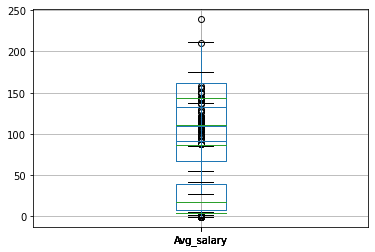

In [34]:
for i in df_num.columns:
    print('{i } boxplot:')
    df_num.boxplot(column=i)
    

In [35]:
df_num.columns

Index(['Rating', 'Age', 'Min_salary', 'Max_salary', 'Avg_salary'], dtype='object')

<AxesSubplot:>

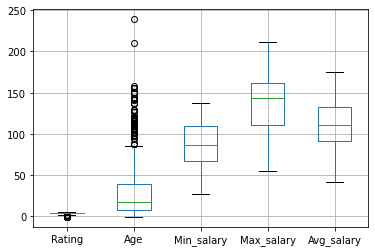

In [36]:
df_num.boxplot(column=['Rating','Age','Min_salary', 'Max_salary','Avg_salary'])

In [37]:
df_num.describe()

,Rating,Age,Min_salary,Max_salary,Avg_salary
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,3.578300,28.606000,85.330000,137.33000,111.330000
std,1.170773,34.457337,28.067007,39.95359,33.587918
min,-1.000000,-1.000000,27.000000,55.00000,41.000000
25%,3.300000,7.000000,67.000000,111.00000,91.500000
50%,3.800000,17.000000,86.000000,144.00000,111.000000
75%,4.200000,39.000000,109.000000,162.00000,133.000000
max,5.000000,239.000000,137.000000,212.00000,174.500000


In [38]:
df_num.corr()

,Rating,Age,Min_salary,Max_salary,Avg_salary
Rating,1.000000,0.106702,0.029937,0.014401,0.021073
Age,0.106702,1.000000,0.019826,0.011811,0.015308
Min_salary,0.029937,0.019826,1.000000,0.949077,0.982288
Max_salary,0.014401,0.011811,0.949077,1.000000,0.991299
Avg_salary,0.021073,0.015308,0.982288,0.991299,1.000000


<AxesSubplot:>

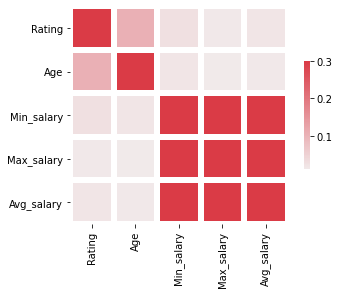

In [39]:
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df_num.corr(),vmax=.3,center=0,cmap=cmap, square=True,linewidths=5,cbar_kws={"shrink":.5})

In [40]:
df.columns

Index(['Job_Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Min_salary', 'Max_salary', 'Avg_salary',
       'Company_Name_Cleaned', 'Job_State_cleaned', 'Age', 'Python', 'SQL',
       'AWS', 'AZURE', 'BIG_DATA', 'Computer_Vision', 'R', 'Visualization',
       'Tableau', 'Power BI', 'Machine_Learning', 'STATISTICS',
       'Deep Learning', 'EXCEL', 'Deployment', 'Job_simplified', 'Seniority',
       'Min_size', 'Max_size', 'AVG_size'],
      dtype='object')

In [41]:
df.rename(columns={'Type of ownership':'Type_of_ownership'}, inplace=True)

In [42]:
df.Type_of_ownership.value_counts()

Company - Private                 588
Company - Public                  193
Nonprofit Organization             92
Subsidiary or Business Segment     51
-1                                 24
Government                         12
Contract                           11
College / University               11
Other Organization                  7
Private Practice / Firm             6
Hospital                            4
Unknown                             1
Name: Type_of_ownership, dtype: int64

In [43]:
df.Revenue.value_counts()

Unknown / Non-Applicable            242
$100 to $500 million (USD)          138
$50 to $100 million (USD)            74
Less than $1 million (USD)           73
$25 to $50 million (USD)             69
$10 to $25 million (USD)             67
$10+ billion (USD)                   67
$1 to $2 billion (USD)               61
$2 to $5 billion (USD)               52
$500 million to $1 billion (USD)     45
$1 to $5 million (USD)               35
$5 to $10 million (USD)              28
$5 to $10 billion (USD)              25
-1                                   24
Name: Revenue, dtype: int64

In [44]:
df['Revenue']=df['Revenue'].apply(lambda x: x.replace('Unknown / Non-Applicable','na'))
df['Revenue']=df['Revenue'].apply(lambda x: x.replace('-1','na'))
df['Revenue']=df['Revenue'].apply(lambda x: x.replace(' (USD)',''))
df['Rev_million']= df['Revenue'].apply(lambda x: 1 if 'million' in x.lower() else 0)
df['Rev_billion']= df['Revenue'].apply(lambda x: 1 if 'billion' in x.lower() else 0)


In [45]:
df.Revenue.value_counts()

na                            266
$100 to $500 million          138
$50 to $100 million            74
Less than $1 million           73
$25 to $50 million             69
$10 to $25 million             67
$10+ billion                   67
$1 to $2 billion               61
$2 to $5 billion               52
$500 million to $1 billion     45
$1 to $5 million               35
$5 to $10 million              28
$5 to $10 billion              25
Name: Revenue, dtype: int64

In [46]:
###      Need MODIFICATION   ##############
####################################
##########################################

#df['Min_Rev']= 

In [47]:
df_cat= df[['Company_Name_Cleaned', 'Job_State_cleaned','Python', 'SQL',
       'AWS', 'AZURE', 'BIG_DATA', 'Computer_Vision', 'R', 'Visualization',
       'Tableau', 'Power BI', 'Machine_Learning', 'STATISTICS',
       'Deep Learning', 'EXCEL', 'Deployment', 'Job_simplified', 'Seniority',
       'Min_size', 'Max_size', 'AVG_size','Type_of_ownership','Industry','Sector','Revenue']]

graph for Company_Name_Cleaned: total = 537


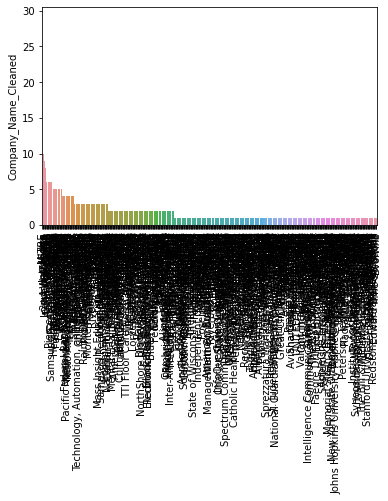

graph for Job_State_cleaned: total = 39


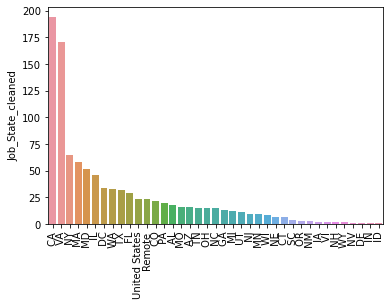

graph for Python: total = 2


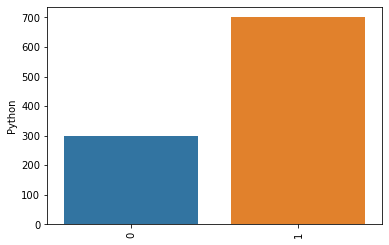

graph for SQL: total = 2


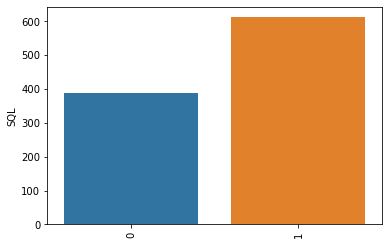

graph for AWS: total = 2


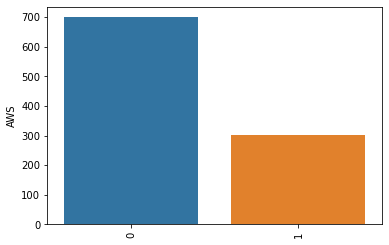

graph for AZURE: total = 2


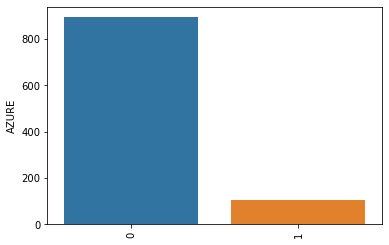

graph for BIG_DATA: total = 2


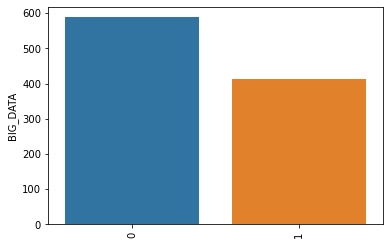

graph for Computer_Vision: total = 2


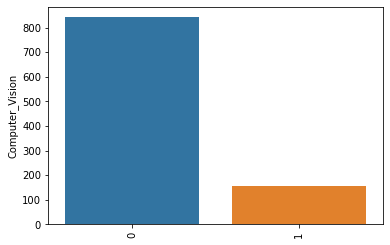

graph for R: total = 1


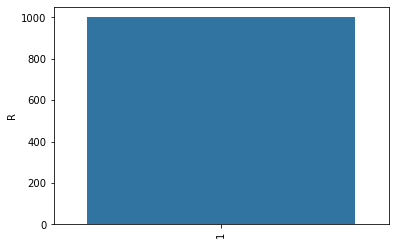

graph for Visualization: total = 2


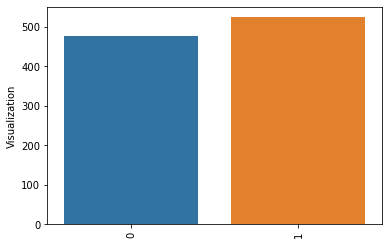

graph for Tableau: total = 2


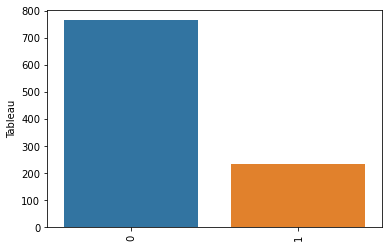

graph for Power BI: total = 2


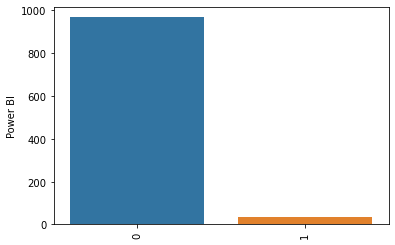

graph for Machine_Learning: total = 2


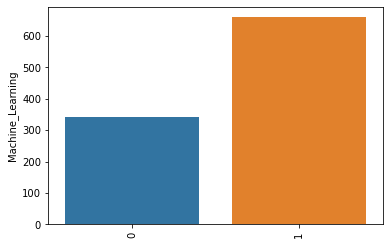

graph for STATISTICS: total = 2


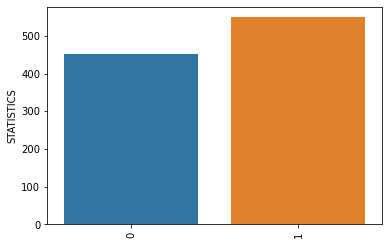

graph for Deep Learning: total = 2


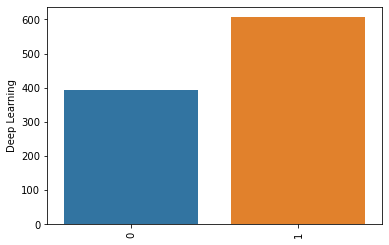

graph for EXCEL: total = 2


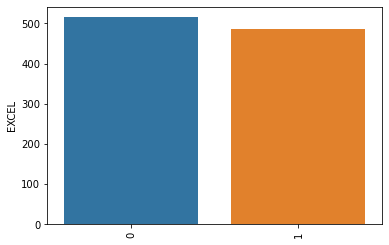

graph for Deployment: total = 2


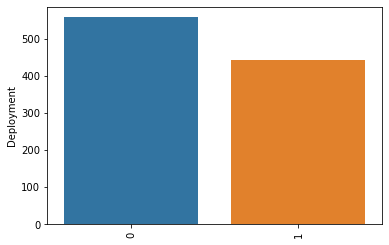

graph for Job_simplified: total = 7


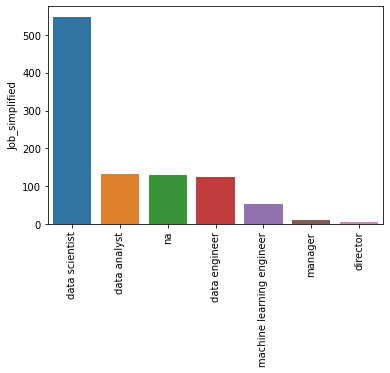

graph for Seniority: total = 2


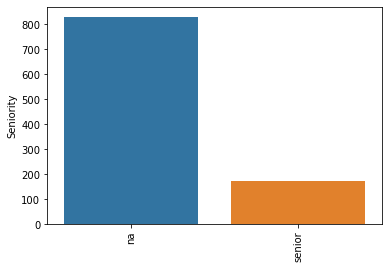

graph for Min_size: total = 8


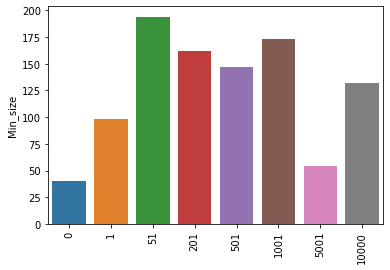

graph for Max_size: total = 8


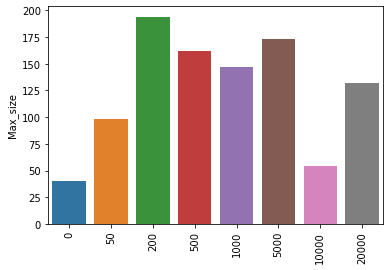

graph for AVG_size: total = 8


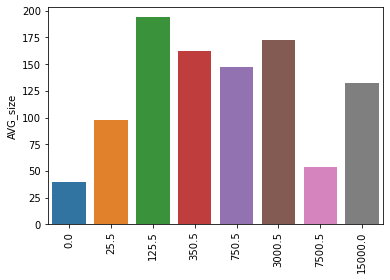

graph for Type_of_ownership: total = 12


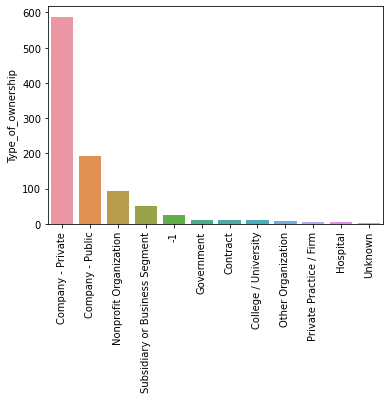

graph for Industry: total = 68


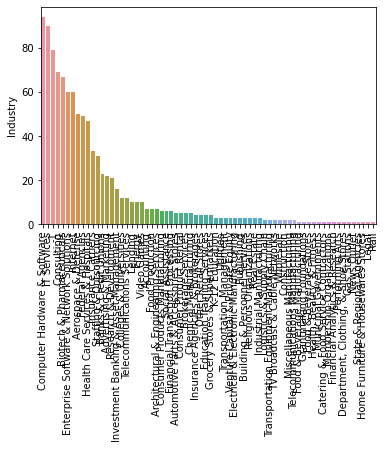

graph for Sector: total = 24


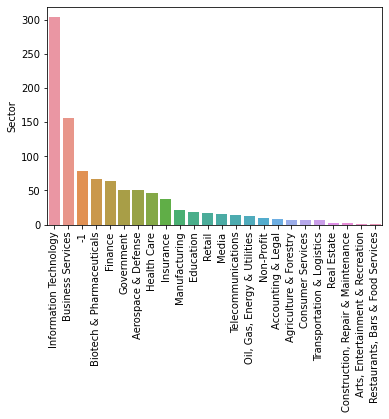

graph for Revenue: total = 13


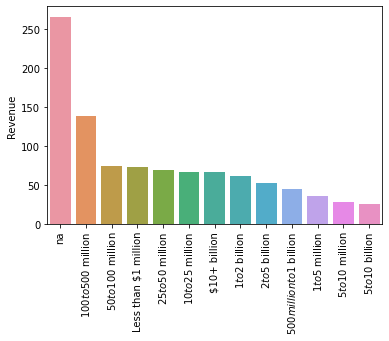

In [48]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print('graph for %s: total = %d'%(i,len(cat_num)))
    chart=sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Company_Name_Cleaned: total = 20


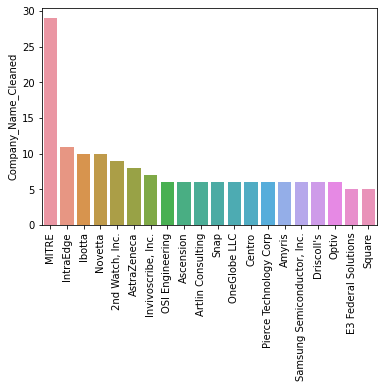

graph for Job_State_cleaned: total = 20


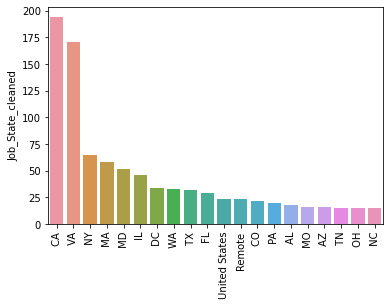

graph for Industry: total = 20


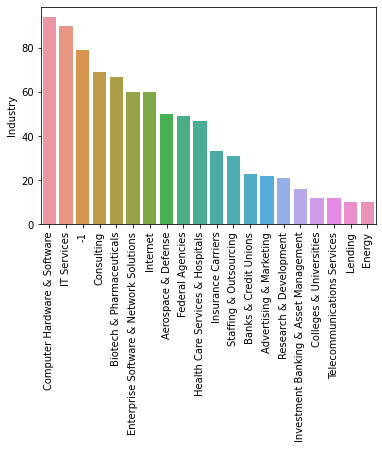

In [49]:
for i in df_cat[['Company_Name_Cleaned', 'Job_State_cleaned', 'Industry']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print('graph for %s: total = %d'%(i,len(cat_num)))
    chart=sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()
    

In [50]:
pd.pivot_table(df, index = 'Job_simplified', values = 'Avg_salary')

,Avg_salary
Job_simplified,
data analyst,115.128788
data engineer,115.345528
data scientist,109.987226
director,87.250000
machine learning engineer,105.407407
manager,116.000000
na,112.182171


In [52]:
pd.pivot_table(df, index = ['Job_simplified','Seniority'], values = 'Avg_salary')

Avg_salary
Job_simplified            Seniority            
data analyst              na         116.489474
                          senior     111.635135
data engineer             na         115.945055
                          senior     113.640625
data scientist            na         109.139796
                          senior     117.146552
director                  na          87.250000
machine learning engineer na         107.465909
                          senior      96.350000
manager                   na         116.000000
na                        na         108.457895
                          senior     122.588235

In [53]:
pd.pivot_table(df, index = 'Job_State_cleaned', values = 'Avg_salary').sort_values('Avg_salary',ascending=False)

,Avg_salary
Job_State_cleaned,
IN,155.500000
WY,150.500000
IA,129.500000
VI,129.000000
NH,129.000000
NE,124.357143
TN,121.066667
CO,120.272727
WA,119.909091


In [61]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  

In [62]:
pd.pivot_table(df, index = ['Job_State_cleaned','Job_simplified'], values = 'Avg_salary',aggfunc='count').sort_values('Job_State_cleaned',ascending=False)

Avg_salary
Job_State_cleaned Job_simplified                       
United States     na                         3         
                  data scientist             2         
                  data engineer              14        
                  data analyst               5         
Remote            data scientist             15        
                  data engineer              4         
                  data analyst               5         
 WY               data analyst               2         
 WI               na                         4         
                  data scientist             3         
                  data analyst               2         
 WA               data scientist             25        
                  data analyst               1         
                  data engineer              1         
                  machine learning engineer  5         
                  na                         1         
 VI               manager                    2         
 VA               data scientist             113       
                  data engineer              15        
                  data analyst               10        
                  machine learning engineer  12        
                  na                         21        
 UT               data scientist             7         
                  data engineer              4         
 TX               na                         5         
                  manager                    2         
                  data scientist             21        
                  data engineer              3         
                  data analyst               1         
 TN               data scientist             9         
                  data analyst               3         
                  na                         3         
 SC               na                         1         
                  data scientist             1         
                  data analyst               2         
 PA               data scientist             3         
                  data engineer              7         
                  data analyst               10        
 OR               data scientist             1         
                  data analyst               2         
 OH               na                         6         
                  data scientist             9         
 NY               data scientist             39        
                  data analyst               7         
                  data engineer              5         
                  machine learning engineer  3         
                  manager                    1         
                  na                         10        
 NV               na                         1         
 NM               data scientist             3         
 NJ               na                         3         
                  data scientist             3         
                  data analyst               4         
 NH               na                         2         
 NE               na                         1         
                  data scientist             1         
                  data analyst               5         
 NC               data scientist             8         
                  data analyst               1         
                  na                         6         
 MO               data scientist             10        
                  data engineer              3         
                  data analyst               3         
 MN               na                         2         
                  director                   2         
                  data scientist             5         
                  data analyst               1         
 MI               na                         1         
                  machine learning engineer  2         
                  data scientist             6         
             

In [65]:
pd.pivot_table(df[df.Job_simplified=='data scientist'], index = 'Job_State_cleaned', values = 'Avg_salary').sort_values('Avg_salary',ascending=False)

,Avg_salary
Job_State_cleaned,
IN,155.500000
AZ,132.000000
MI,129.166667
PA,124.166667
WA,121.680000
MN,120.200000
Remote,115.766667
TN,115.555556
CO,115.500000


In [66]:
df.columns

Index(['Job_Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type_of_ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Min_salary', 'Max_salary', 'Avg_salary',
       'Company_Name_Cleaned', 'Job_State_cleaned', 'Age', 'Python', 'SQL',
       'AWS', 'AZURE', 'BIG_DATA', 'Computer_Vision', 'R', 'Visualization',
       'Tableau', 'Power BI', 'Machine_Learning', 'STATISTICS',
       'Deep Learning', 'EXCEL', 'Deployment', 'Job_simplified', 'Seniority',
       'Min_size', 'Max_size', 'AVG_size', 'Rev_million', 'Rev_billion'],
      dtype='object')

In [73]:
df_pivots= df [['Rating', 'Industry','Sector', 'Python', 'SQL',
       'AWS', 'AZURE', 'BIG_DATA', 'Computer_Vision', 'R', 'Visualization',
       'Tableau', 'Power BI', 'Machine_Learning', 'STATISTICS',
       'Deep Learning', 'EXCEL', 'Deployment', 'Job_simplified', 'Seniority',
            'Job_State_cleaned', 'Age', 'Revenue','Avg_salary']]

In [75]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index=i,values='Avg_salary').sort_values('Avg_salary',ascending=False))

Rating
        Avg_salary
Rating            
 1.5    144.500000
 4.8    130.562500
 2.1    129.000000
 4.1    122.613636
 4.4    118.742424
 2.5    118.576923
 2.7    118.055556
 5.0    116.613636
 2.0    115.500000
 3.3    114.767123
 2.2    114.500000
 4.2    114.427083
 3.5    114.203125
 3.8    113.985507
 3.6    113.663462
 4.3    112.261905
 4.5    112.048780
 2.8    111.888889
 4.6    111.714286
 3.9    110.838028
-1.0    109.184783
 4.0    108.547297
 3.4    107.583333
 2.3    106.500000
 3.7    106.182692
 3.1    105.547619
 2.6    103.428571
 3.2    101.920000
 4.9    98.769231 
 2.9    98.208333 
 3.0    96.392857 
 4.7    91.000000 
 2.4    86.000000 
Industry
                                         Avg_salary
Industry                                           
Grantmaking Foundations                  174.500000
Home Furniture & Housewares Stores       168.000000
Department, Clothing, & Shoe Stores      168.000000
Financial Analytics & Research           168.000000
Caterin

ValueError: Grouper for 'Avg_salary' not 1-dimensional

In [77]:
pd.pivot_table(df_pivots, index='Revenue',columns='Python',values='Avg_salary', aggfunc= 'count')

Python,0,1
Revenue,,
$1 to $2 billion,11,50
$1 to $5 million,5,30
$10 to $25 million,22,45
$10+ billion,11,56
$100 to $500 million,48,90
$2 to $5 billion,13,39
$25 to $50 million,17,52
$5 to $10 billion,12,13
$5 to $10 million,11,17


In [87]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

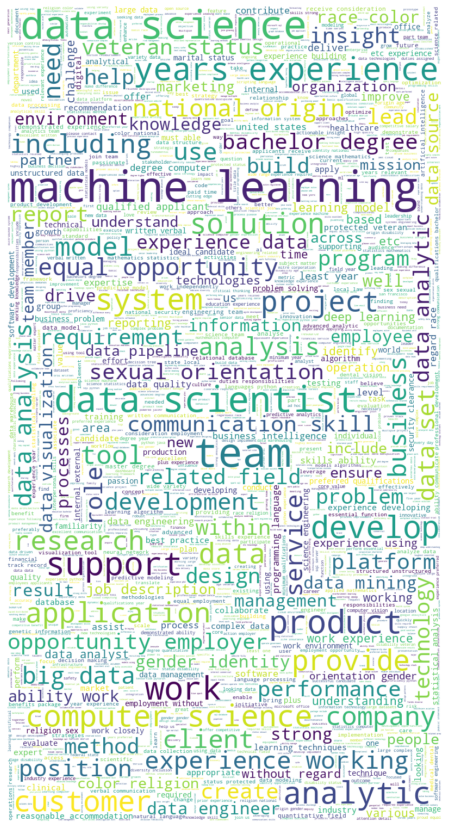

In [90]:
#nltk.download('stopwords')
words=" ".join(df['Job Description'])


def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered=[]
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered= punctuation_stop(words)
text = " ".join([ele for ele in words_filtered])
wc=WordCloud(background_color='white',random_state=1,stopwords=STOPWORDS,max_words=2000,width=800,height=1500)
wc.generate(text)

plt.figure(figsize=[15,15])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()